In [2]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Creating a new output of heart disease risk rating based on logistic regression model. Plotting each parameter against the newly created risk rating to look for any dependencies:

Confusion Matrix:
[[ 86  12]
 [ 19 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230

     Risk Rating (0-10)
0              0.223883
1              1.617108
2              9.750028
3              9.793037
4              0.387372
..                  ...
225            0.118710
226            8.268200
227            8.065138
228            0.627702
229            1.447121

[230 rows x 1 columns]


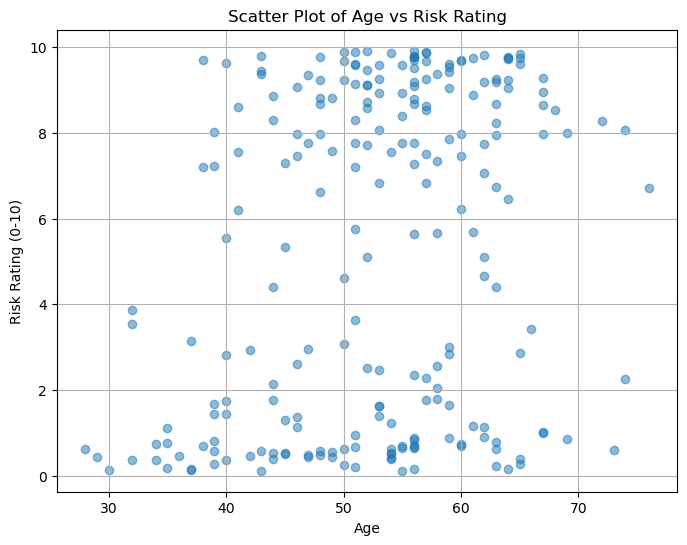

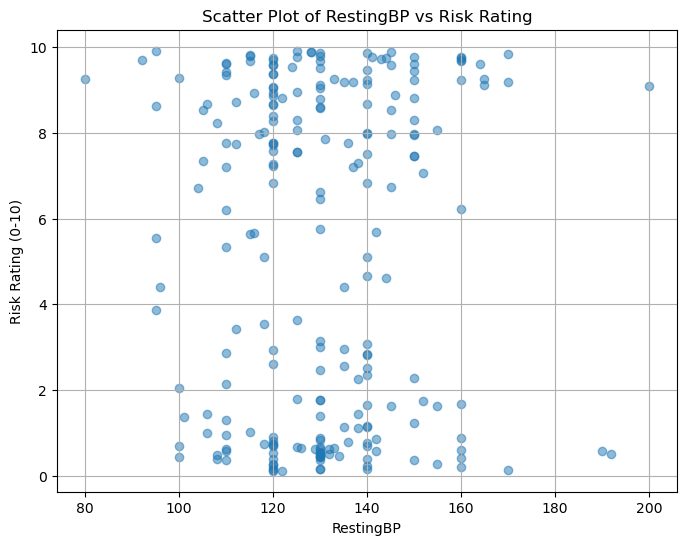

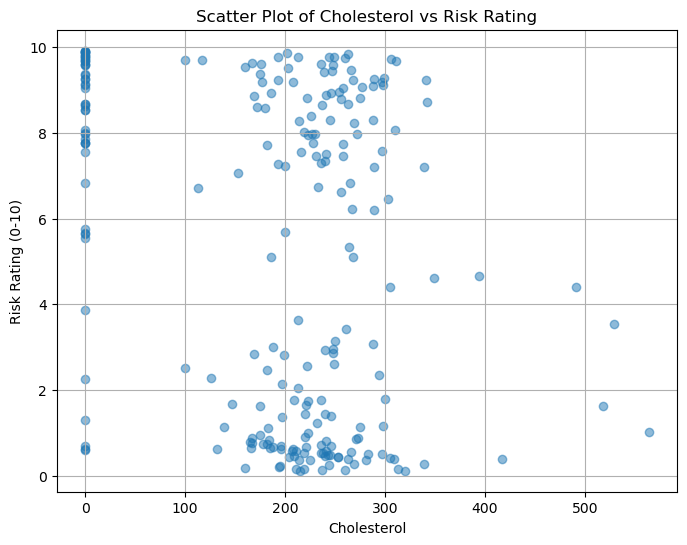

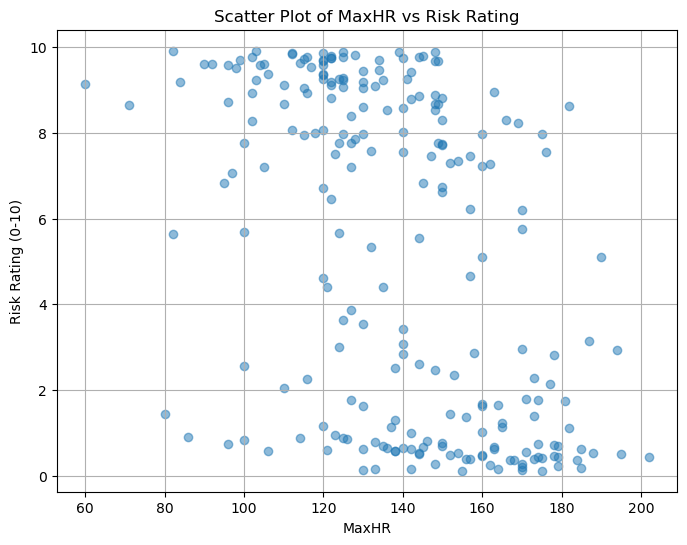

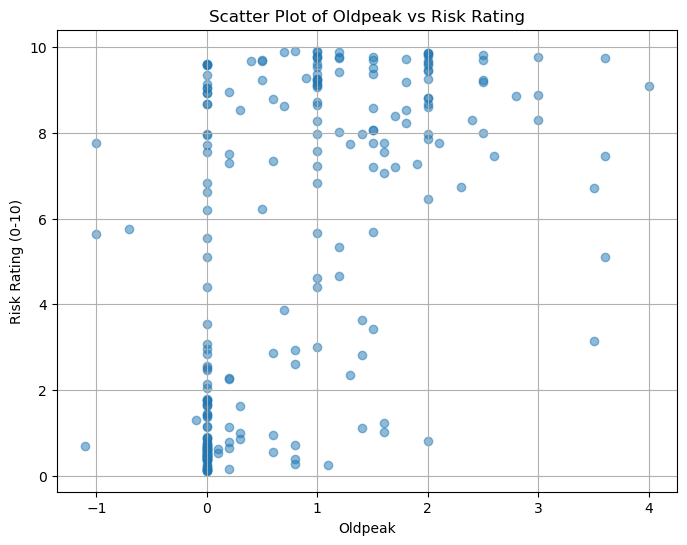

In [4]:

# Load the dataset
data = pd.read_csv('../data/heart.csv')

# Identify feature columns and target variable
feature_cols = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
                'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
target_col = 'HeartDisease'

# Separate features and target
X = data[feature_cols]
y = data[target_col]

# Step 1: Preprocess the data
# Numeric features to be scaled
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Step 2: Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression())])

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 4: Train the model
pipeline.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Calculate the probabilities of heart disease risk
risk_probabilities = pipeline.predict_proba(X_test)[:, 1]  # Probability of the positive class (Heart Disease)

# Convert probabilities to a risk rating (0-10 scale)
risk_ratings = risk_probabilities * 10

# Display the risk ratings for the test set
risk_ratings_df = pd.DataFrame({'Risk Rating (0-10)': risk_ratings})
print(risk_ratings_df)

# Step 7: Create scatter plots for each feature against the risk rating
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[feature], risk_ratings, alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs Risk Rating')
    plt.xlabel(feature)
    plt.ylabel('Risk Rating (0-10)')
    plt.grid()
    plt.show()

Looking at the plot graphs, no clear dependencies or correlations between each parameter and the risk rating can be observed. Let's try normalizing the data to account for different scales:

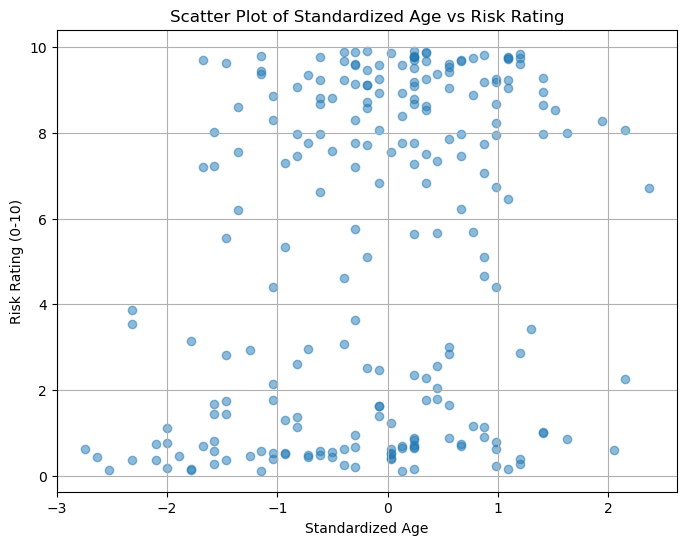

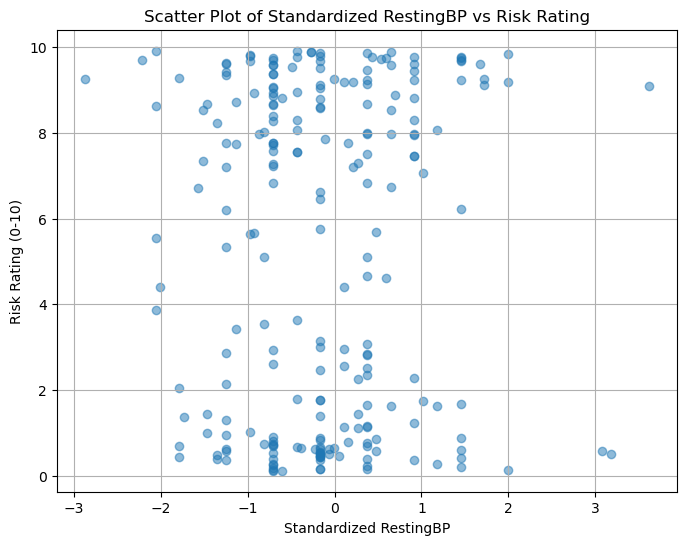

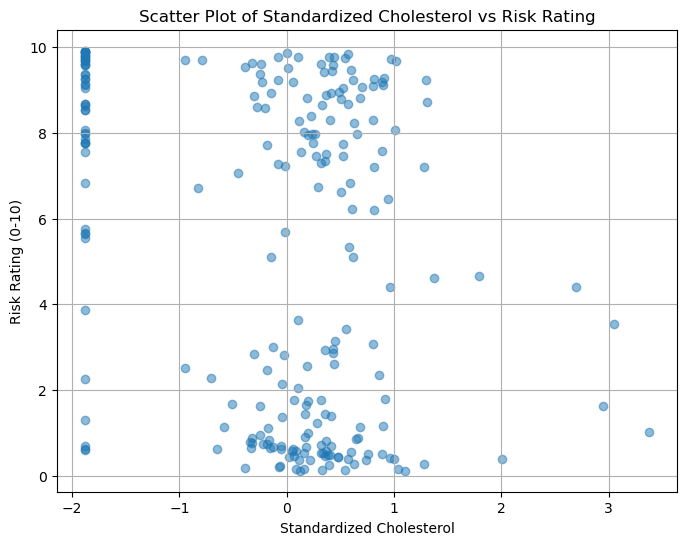

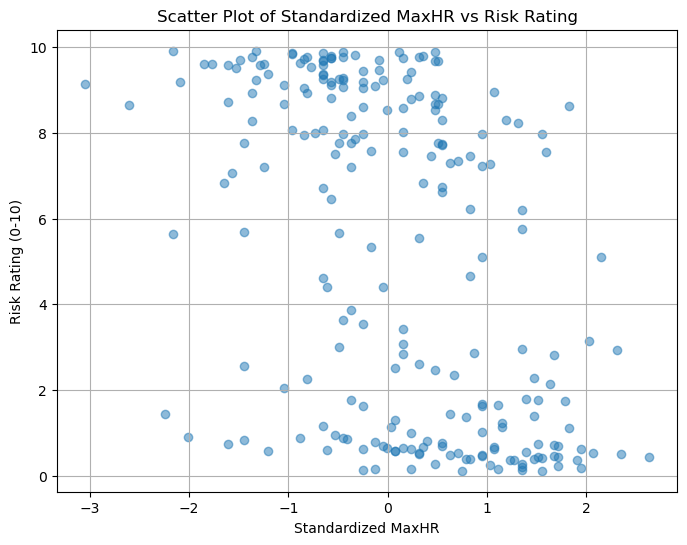

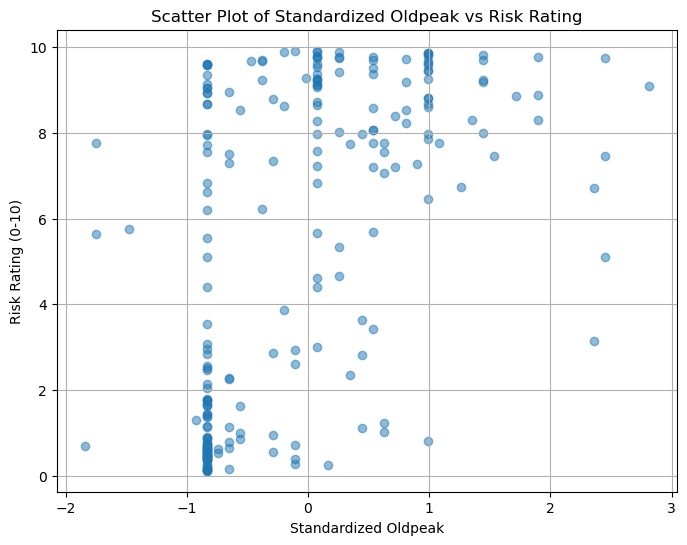

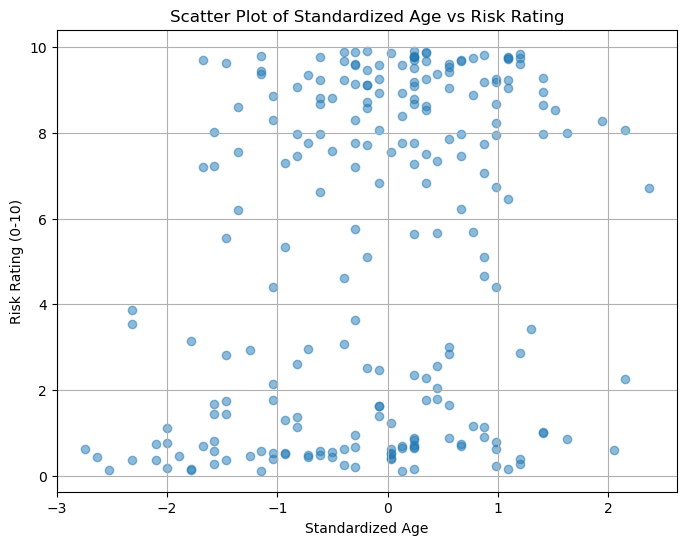

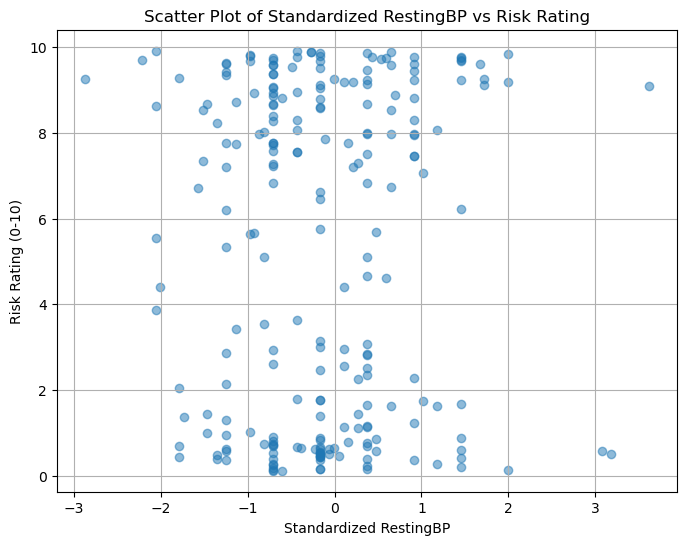

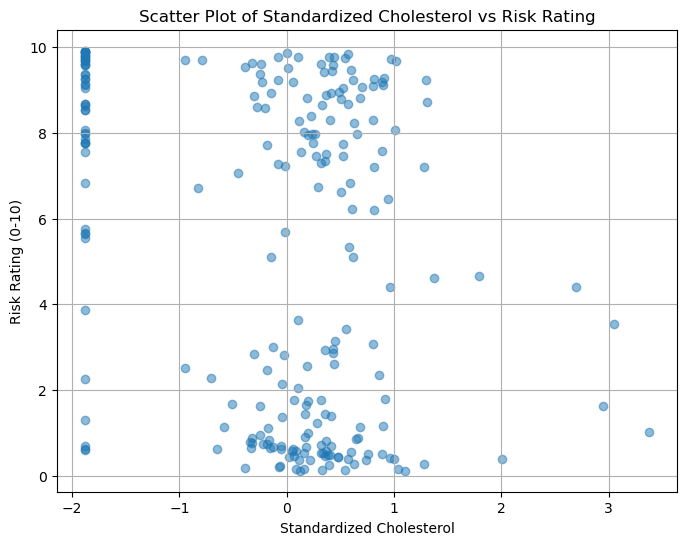

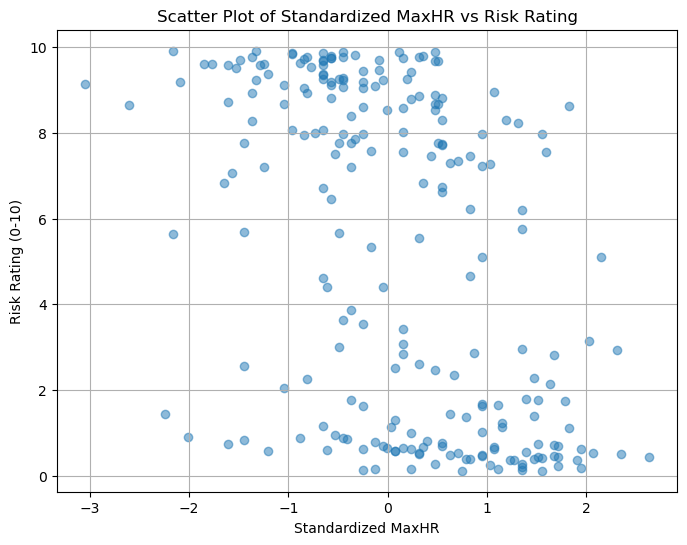

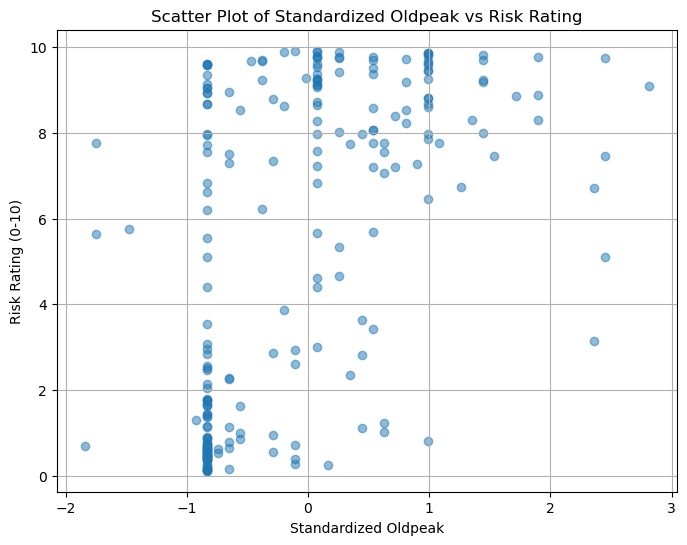

In [17]:


# Step 1: Preprocess the data
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Step 2: Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 4: Train the model
pipeline.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = pipeline.predict(X_test)

# Step 6: Calculate the probabilities of heart disease risk
risk_probabilities = pipeline.predict_proba(X_test)[:, 1]
risk_ratings = risk_probabilities * 10

# Transform the test data to get the standardized numeric features
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

# Extract the standardized numeric features
numeric_indices = np.arange(len(numeric_features))
X_test_standardized_numeric = X_test_transformed[:, numeric_indices]

# Create scatter plots for each standardized numeric feature against the risk rating
for i, feature in enumerate(numeric_features):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_standardized_numeric[:, i], risk_ratings, alpha=0.5)
    plt.title(f'Scatter Plot of Standardized {feature} vs Risk Rating')
    plt.xlabel(f'Standardized {feature}')
    plt.ylabel('Risk Rating (0-10)')
    plt.grid()
    plt.show()
# Transform the test data to get the standardized numeric features
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

# Extract the standardized numeric features from the transformed data
# Since OneHotEncoder may add extra columns, we select the first numeric columns
import numpy as np

# Get the column indices of the numeric features after transformation
numeric_indices = np.arange(len(numeric_features))

# Extract the standardized numeric data
X_test_standardized_numeric = X_test_transformed[:, numeric_indices]

# Create scatter plots for each standardized numeric feature against the risk rating
for i, feature in enumerate(numeric_features):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_standardized_numeric[:, i], risk_ratings, alpha=0.5)
    plt.title(f'Scatter Plot of Standardized {feature} vs Risk Rating')
    plt.xlabel(f'Standardized {feature}')
    plt.ylabel('Risk Rating (0-10)')
    plt.grid()
    plt.show()

Data standartization has not showed any clear dependencies either. This can be explained by a complex multifactor correlation between health parameters and the heart disease risk. The dataset may be limited also, and not all parameters may be accounted for in the data provided. Linear regression model seems to be ineffective in this case. We can add regression lines to the graphs to see what trends and correlations are present in general. Creating standardized scatter plots with linear regression lines to visualize trends and relationships between each parameter and the heart rate risk factor:

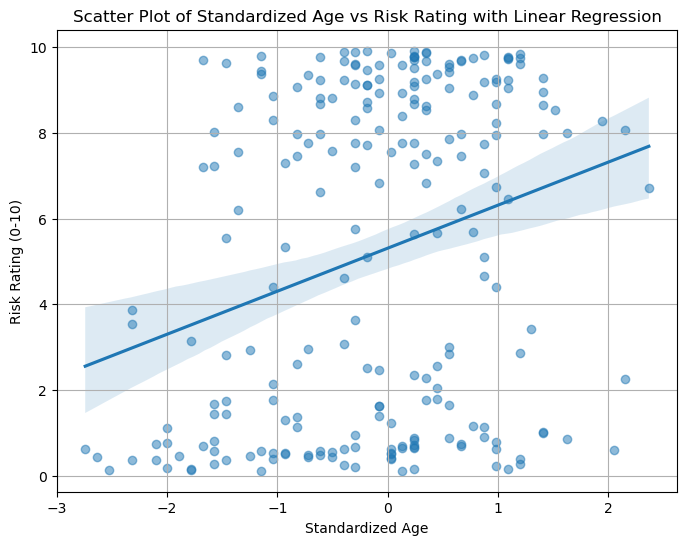

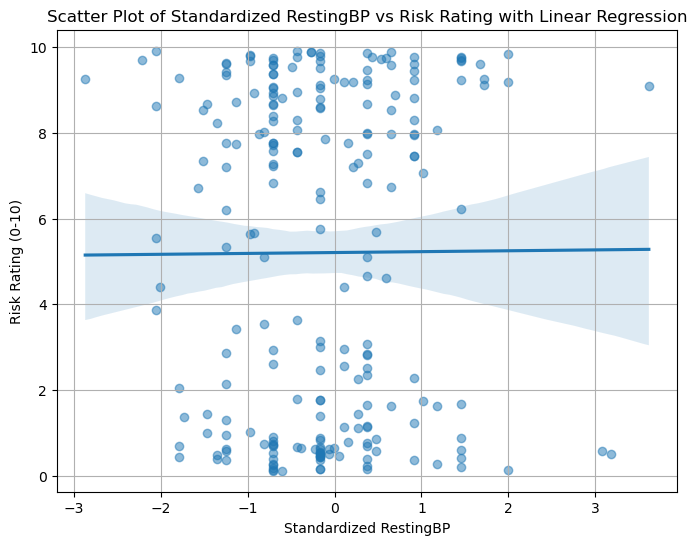

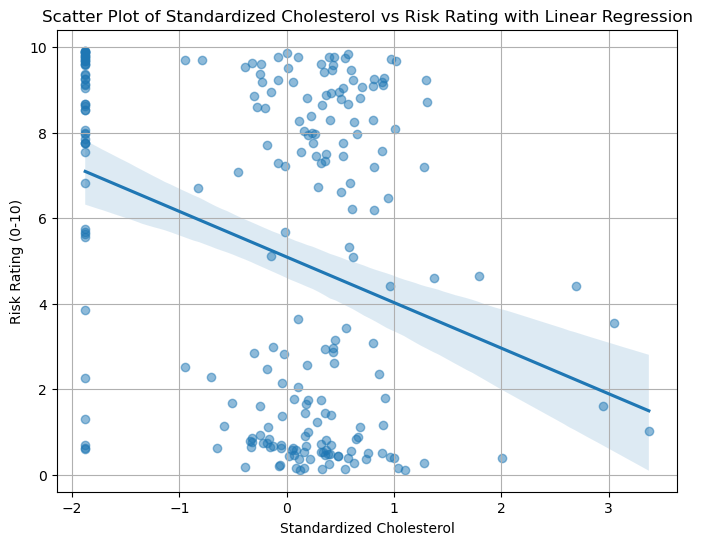

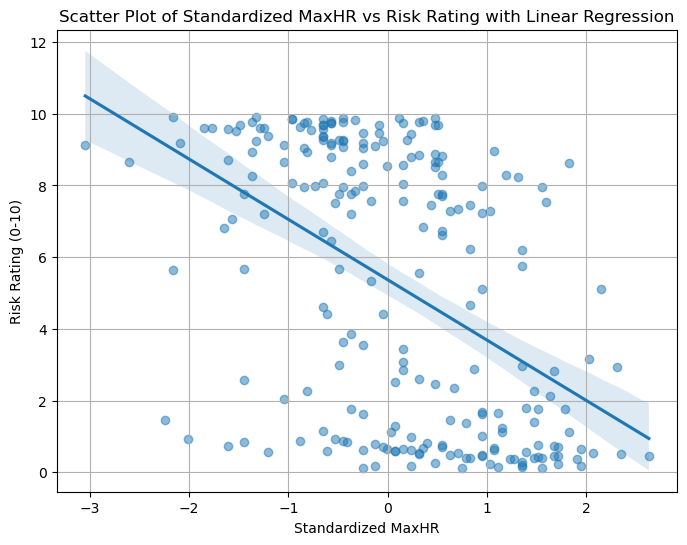

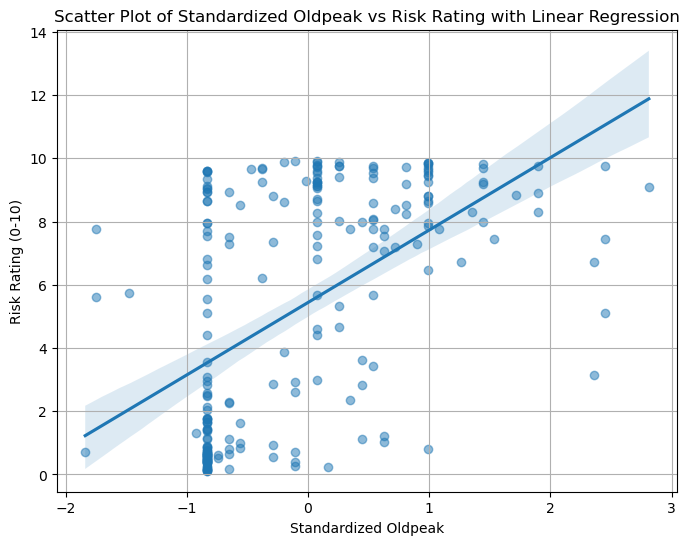

In [8]:
# Create scatter plots with linear regression for each standardized numeric feature against the risk rating
for i, feature in enumerate(numeric_features):
    plt.figure(figsize=(8, 6))
    
    # Create a DataFrame for easier plotting with seaborn
    plot_data = pd.DataFrame({
        f'Standardized {feature}': X_test_standardized_numeric[:, i],
        'Risk Rating (0-10)': risk_ratings
    })
    
    # Use seaborn's regplot to add scatter plot with a linear regression line
    sns.regplot(x=f'Standardized {feature}', y='Risk Rating (0-10)', data=plot_data, scatter_kws={'alpha': 0.5})
    
    # Customize the plot
    plt.title(f'Scatter Plot of Standardized {feature} vs Risk Rating with Linear Regression')
    plt.xlabel(f'Standardized {feature}')
    plt.ylabel('Risk Rating (0-10)')
    plt.grid(True)
    
    # Show the plot
    plt.show()

We can observe positive association between oldpeak and heart disease risk, as well as age. Negative association exists for maximum heart rate and cholesterol levels. The results are scattered and a clear linear correlation is not present. Here is a conclusion:

Oldpeak: This measures the ST depression induced by exercise relative to rest. A higher Oldpeak indicates more significant heart stress during exercise, which can indeed be positively associated with heart disease risk. So, a positive association here makes sense.

Age: As people get older, the risk of heart disease generally increases. A positive association between age and heart disease risk is common in medical studies.

MaxHR (Maximum Heart Rate): MaxHR tends to decrease with age, and a lower MaxHR could indicate a higher heart disease risk. Therefore, you could see a negative association here—i.e., individuals with a higher MaxHR are often healthier, implying a lower heart disease risk.

Cholesterol: While high cholesterol is a risk factor for heart disease, the relationship isn't always linear. Total cholesterol levels can be affected by various factors, and depending on the dataset or sample, you might observe a weaker or even negative association. It could be that other features (like Age or Oldpeak) play a more dominant role in determining risk in this particular sample, leading to this observation.

Resting BP (Blood Pressure): There seems to be very little to none correlation for the sample dataset provided.

Scattered Results and Lack of Clear Linear Correlation:
In medical datasets, it's common for results to be scattered due to the complex and multifactorial nature of diseases like heart disease. While linear models can give a general sense of association, they may not capture the entire relationship, as heart disease risk is influenced by many factors that may interact in non-linear ways.
Your findings suggest that while there are tendencies (positive or negative associations), the relationship between these features and heart disease risk is complex and may not fit neatly into a linear pattern, which is typical in real-world health data.

